In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dfd=pd.read_excel("C:\\Users\\91939\\Downloads\\Copy of loan.xlsx")
df=dfd.copy()

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.shape

(614, 13)

In [19]:
df["Loan_Status"].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

<Axes: >

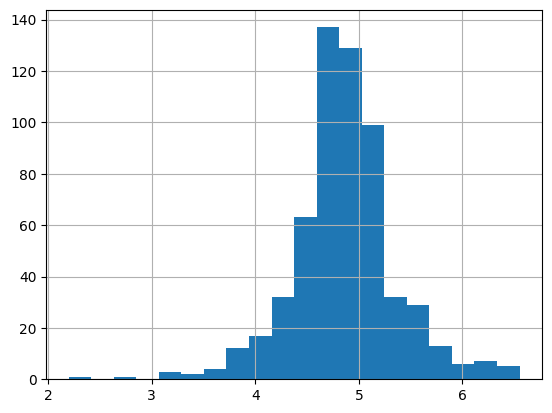

In [20]:
df["logamount"]=np.log(df["LoanAmount"])
df["logamount"].hist(bins=20)

In [21]:
df["logamount"]

0           NaN
1      4.852030
2      4.189655
3      4.787492
4      4.948760
         ...   
609    4.262680
610    3.688879
611    5.533389
612    5.231109
613    4.890349
Name: logamount, Length: 614, dtype: float64

<Axes: >

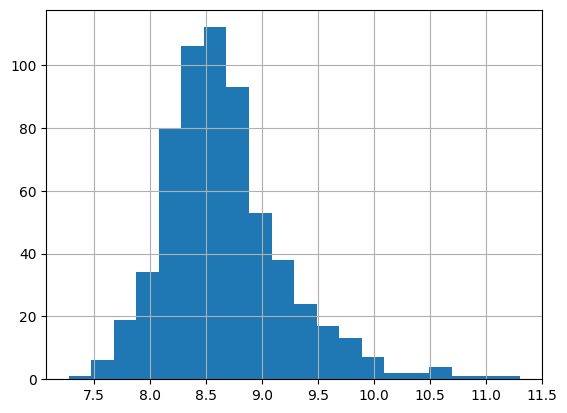

In [22]:
df["Totalincome"]=df["ApplicantIncome"]+df["CoapplicantIncome"]
df["totalincome_log"]=np.log(df["Totalincome"])
df["totalincome_log"].hist(bins=20)

In [23]:
df["totalincome_log"]

0      8.674026
1      8.714568
2      8.006368
3      8.505323
4      8.699515
         ...   
609    7.972466
610    8.320205
611    9.025456
612    8.933664
613    8.430109
Name: totalincome_log, Length: 614, dtype: float64

In [24]:
df["Totalincome"]

0      5849.0
1      6091.0
2      3000.0
3      4941.0
4      6000.0
        ...  
609    2900.0
610    4106.0
611    8312.0
612    7583.0
613    4583.0
Name: Totalincome, Length: 614, dtype: float64

In [25]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0],inplace=True)
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].mean())
df["logamount"]=df["logamount"].fillna(df["logamount"].mean())
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
logamount            0
Totalincome          0
totalincome_log      0
dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

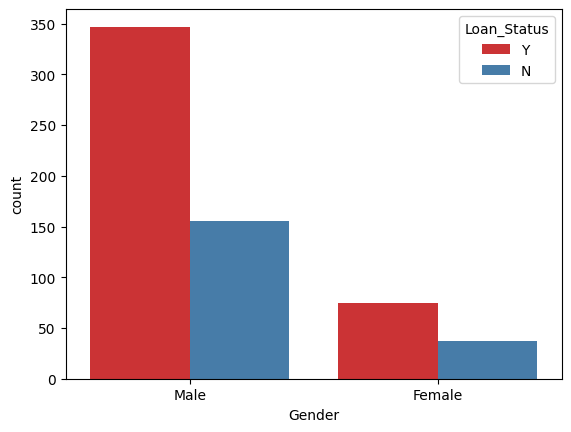

In [26]:
sns.countplot(x="Gender",data=df,hue="Loan_Status",palette="Set1")

<Axes: xlabel='Dependents', ylabel='count'>

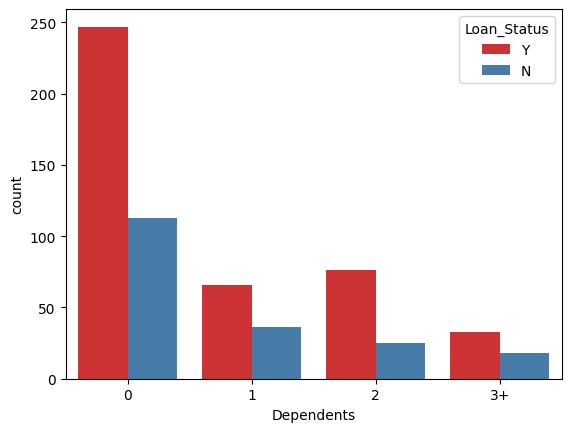

In [27]:
sns.countplot(x="Dependents",data=df,hue="Loan_Status",palette="Set1")

<Axes: xlabel='Married', ylabel='count'>

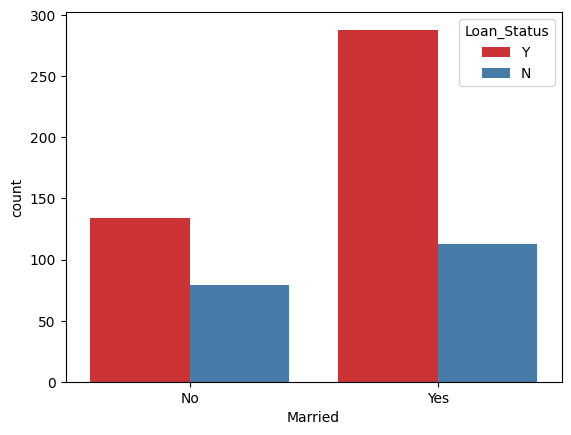

In [28]:
sns.countplot(x="Married",data=df,hue="Loan_Status",palette="Set1")

<Axes: xlabel='Education', ylabel='count'>

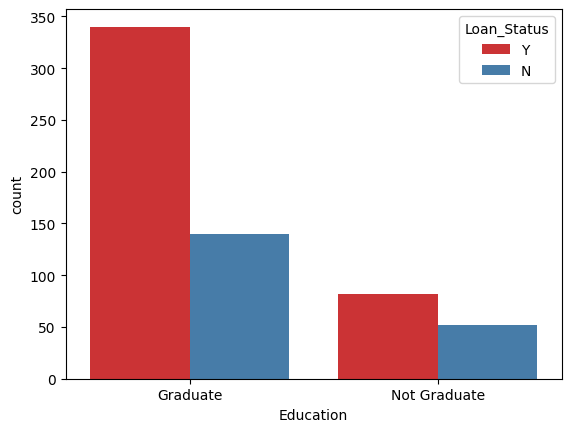

In [29]:
sns.countplot(x="Education",data=df,hue="Loan_Status",palette="Set1")

<Axes: xlabel='Self_Employed', ylabel='count'>

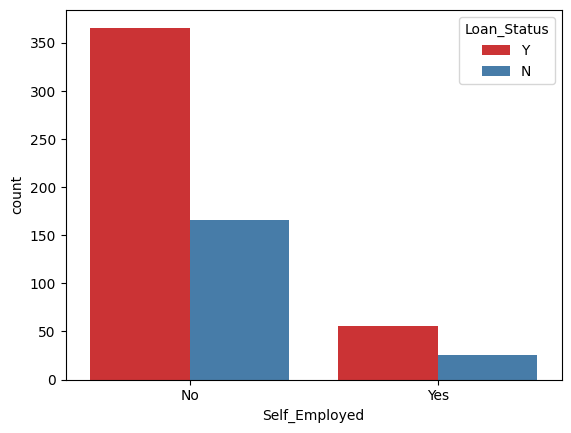

In [30]:
sns.countplot(x="Self_Employed",data=df,hue="Loan_Status",palette="Set1")

<Axes: xlabel='Credit_History', ylabel='count'>

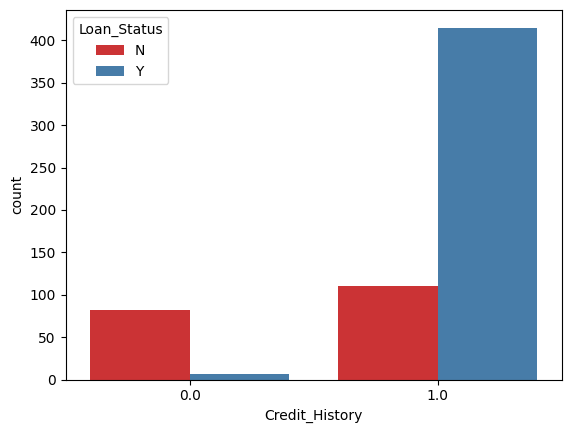

In [31]:
sns.countplot(x="Credit_History",data=df,hue="Loan_Status",palette="Set1")

<Axes: xlabel='Property_Area', ylabel='count'>

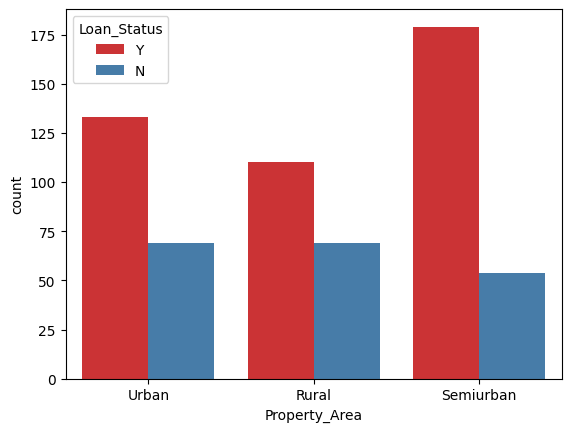

In [32]:
sns.countplot(x="Property_Area",data=df,hue="Loan_Status",palette="Set1")

In [33]:
#building a balanced dataframe
approved=df[df["Loan_Status"]=="Y"]
not_approved=df[df["Loan_Status"]=="N"]


In [34]:
approved_sample=approved.sample(n=192)
new_df=pd.concat([approved_sample,not_approved],axis=0)

In [35]:
new_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,logamount,Totalincome,totalincome_log
485,LP002544,Male,Yes,1,Not Graduate,No,1958,2436.0,131.0,360.0,1.0,Rural,Y,4.875197,4394.0,8.387995
79,LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,1.0,Semiurban,Y,4.867534,5499.0,8.612322
289,LP001935,Male,No,0,Graduate,No,9508,0.0,187.0,360.0,1.0,Rural,Y,5.231109,9508.0,9.159889
462,LP002487,Male,Yes,0,Graduate,No,3015,2188.0,153.0,360.0,1.0,Rural,Y,5.030438,5203.0,8.556991
204,LP001691,Male,Yes,2,Not Graduate,No,3917,0.0,124.0,360.0,1.0,Semiurban,Y,4.820282,3917.0,8.273081


In [17]:
new_df["Loan_Status"].value_counts()

Loan_Status
Y    192
N    192
Name: count, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
x=new_df.iloc[:,[1,2,3,4,9,10,13,14]]
y=new_df.iloc[:,12]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)
lb=LabelEncoder()

In [40]:
import pickle
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define features
numeric_features = ['Dependents', 'Loan_Amount_Term', 'Credit_History', 'logamount', 'Totalincome']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = ["Gender", "Married", "Education"]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Replace '3+' with 3 (or another appropriate numeric value)
x_train['Dependents'] = x_train['Dependents'].replace('3+', 3).astype(float)

# Ensure all numeric features are indeed numeric
x_train[numeric_features] = x_train[numeric_features].apply(pd.to_numeric, errors='coerce')

# Combine transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with preprocessing and RandomForestClassifier
random_forest_model = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('classifier', RandomForestClassifier())])

# Train the model
random_forest_model.fit(x_train, y_train)

# Save the trained model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(random_forest_model, file)


In [ ]:
import tkinter as tk
from tkinter.ttk import Combobox
import pandas as pd
import pickle

# Load the trained model
with open('logisticmodel.pkl', 'rb') as file:
    logisticmodel = pickle.load(file)

# Load Excel data (replace with your actual file path)
df2 = pd.read_excel("C:\\Users\\91939\\Downloads\\Copy of loan.xlsx")

# Define unique values for dropdowns
genders = list(df["Gender"].unique())
married_status = list(df['Married'].unique())
dependents = list(df['Dependents'].unique())
educations = list(df['Education'].unique())
loan_amount_terms = list(df['Loan_Amount_Term'].unique())
credit_histories = list(df['Credit_History'].unique())
log_amounts = list(df['logamount'].unique())
total_incomes = list(df['Totalincome'].unique())

def predict_output():
    gender = gender_var.get()
    married = married_var.get()
    dependents_value = int(dependents_var.get())
    education = education_var.get()
    loan_amount_term = float(loanamount_var.get())  # Use float() for floating-point numbers
    credit_history = int(float(credithistory_var.get()))  # Convert to float first, then to int
    log_amount = float(logamount_var.get())  # Use float() for floating-point numbers
    total_income = float(totalincome_var.get())  # Use float() for floating-point numbers

    input_data = pd.DataFrame([[gender, married, dependents_value, education, loan_amount_term, credit_history, log_amount, total_income]], 
                              columns=['Gender', 'Married', 'Dependents', 'Education', 'Loan_Amount_Term', 'Credit_History', 'logamount', 'Totalincome'])
    
    prediction = logisticmodel.predict(input_data)[0]
    if prediction=="Y":
        o="YES"
        lbn.config(text=f"Prediction: {o}")
    else:
        o="NO"
        lbn.config(text=f"Prediction: {o}")


# Initialize Tkinter
root = tk.Tk()
root.title("Loan Approval Prediction")
root.configure(bg="#E0FFFF")

img= tk.PhotoImage(file="C:\\Users\\91939\\Downloads\\Loan_Prediction.png")
myimage = tk.Label(root, image=img)
myimage.place(x=0,y=150,height=480,width=800)

head=tk.Label(root,text="loan Approval Prediction",font="Arial 50",bg="#E0FFFF")
head.place(x=0,y=0,width=1600)



# Entries Frame
entries = tk.Frame(root, width=600, height=600,bg="#E0FFFF")
entries.place(x=800, y=200)

# Widgets
tk.Label(entries, text="Gender", font="Arial 13").place(x=30, y=0)
gender_var = tk.StringVar()
gender_cmb = Combobox(entries, textvariable=gender_var, values=genders)
gender_cmb.place(x=30, y=30)

tk.Label(entries, text="Marital status", font="Arial 13").place(x=400, y=0)
married_var = tk.StringVar()
married_cmb = Combobox(entries, textvariable=married_var, values=married_status)
married_cmb.place(x=400, y=30)

tk.Label(entries, text="Dependents", font="Arial 13").place(x=30, y=60)
dependents_var = tk.StringVar()
dependents_cmb = Combobox(entries, textvariable=dependents_var, values=dependents)
dependents_cmb.place(x=30, y=90)

tk.Label(entries, text="Education", font="Arial 13").place(x=400, y=60)
education_var = tk.StringVar()
education_cmb = Combobox(entries, textvariable=education_var, values=educations)
education_cmb.place(x=400, y=90)

tk.Label(entries, text="Loan Amount Term", font="Arial 13").place(x=30, y=120)
loanamount_var = tk.StringVar()
loanamount_cmb = Combobox(entries, textvariable=loanamount_var, values=loan_amount_terms)
loanamount_cmb.place(x=30, y=150)

tk.Label(entries, text="Credit History", font="Arial 13").place(x=400, y=120)
credithistory_var = tk.StringVar()
credithistory_cmb = Combobox(entries, textvariable=credithistory_var, values=credit_histories)
credithistory_cmb.place(x=400, y=150)

tk.Label(entries, text="Log Amount", font="Arial 13").place(x=30, y=180)
logamount_var = tk.StringVar()
logamount_cmb = Combobox(entries, textvariable=logamount_var, values=log_amounts)
logamount_cmb.place(x=30, y=210)

tk.Label(entries, text="Total Income", font="Arial 13").place(x=400, y=180)
totalincome_var = tk.StringVar()
totalincome_cmb = Combobox(entries, textvariable=totalincome_var, values=total_incomes)
totalincome_cmb.place(x=400, y=210)

# Prediction Label
lbn = tk.Label(entries, text="", font="Arial 20")
lbn.place(x=200, y=350)

# Predict Button
btn = tk.Button(entries, text="PREDICT", bg="pink", command=predict_output)
btn.place(x=200, y=400, width=200, height=50)

# Run the GUI
root.mainloop()
